In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd


In [2]:
data = pd.read_csv(r'C:\Users\hp\Desktop\Python\Machine Learning Lab\winequality-red.csv')

In [3]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values


In [4]:
X

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [5]:
y

array([5, 5, 5, ..., 6, 5, 6], dtype=int64)

In [6]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [7]:
X

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test)


In [10]:
class WineQualityPredictor(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(WineQualityPredictor, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [11]:
input_size = X_train.shape[1]
hidden_size = 64
output_size = 1


In [12]:
model = WineQualityPredictor(input_size, hidden_size, output_size)


In [13]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [14]:
num_epochs = 1000

In [15]:
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor.view(-1, 1))

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 13.6740
Epoch [200/1000], Loss: 3.0906
Epoch [300/1000], Loss: 2.0562
Epoch [400/1000], Loss: 1.6455
Epoch [500/1000], Loss: 1.3607
Epoch [600/1000], Loss: 1.1332
Epoch [700/1000], Loss: 0.9495
Epoch [800/1000], Loss: 0.8057
Epoch [900/1000], Loss: 0.6895
Epoch [1000/1000], Loss: 0.5991


In [16]:
with torch.no_grad():
    model.eval()
    y_pred = model(X_test_tensor)
    mse = criterion(y_pred, y_test_tensor.view(-1, 1))
    print(f'Mean Squared Error on Test Set: {mse.item():.4f}')

Mean Squared Error on Test Set: 0.6003


In [23]:


# Example: Creating new data for prediction
new_data_dict = {
    'fixed acidity': [8.2],
    'volatile acidity': [0.6],
    'citric acid': [0.2],
    'residual sugar': [2.0],
    'chlorides': [0.081],
    'free sulfur dioxide': [10],
    'total sulfur dioxide': [24],
    'density': [0.997],
    'pH': [3.5],
    'sulphates': [0.65],
    'alcohol': [11.0]
}

new_data = pd.DataFrame(new_data_dict)




In [24]:
new_data_scaled = scaler.transform(new_data)
new_data_tensor = torch.FloatTensor(new_data_scaled)

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [20]:
with torch.no_grad():
    model.eval()
    predictions = model(new_data_tensor)


In [21]:
predictions

tensor([[4.9239]])

In [27]:
from sklearn.metrics import mean_squared_error

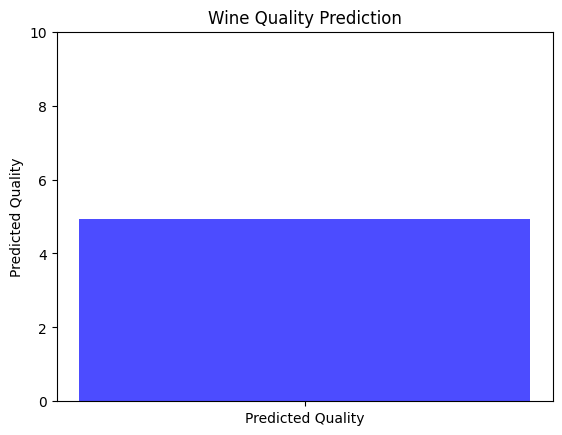

In [29]:
import matplotlib.pyplot as plt

# Convert the predictions to NumPy array
predicted_quality = predictions.numpy().flatten()

# Plotting the predictions
plt.bar(range(len(predicted_quality)), predicted_quality, color='blue', alpha=0.7)
plt.xticks(range(len(predicted_quality)), ['Predicted Quality'])
plt.title('Wine Quality Prediction')
plt.ylabel('Predicted Quality')
plt.ylim(0, 10)  
plt.show()
